# Dados

In [20]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.feature_selection import RFE
import matplotlib.pyplot as plt
import seaborn as sns

from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [27]:
df = pd.read_csv('train.csv')
df.head()

,Unnamed: 0,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,IN_OUTRA_DEF,IN_SABATISTA,IN_GESTANTE,IN_LACTANTE,IN_IDOSO,IN_ESTUDA_CLASSE_HOSPITALAR,IN_SEM_RECURSO,IN_BRAILLE,IN_AMPLIADA_24,IN_AMPLIADA_18,IN_LEDOR,IN_ACESSO,IN_TRANSCRICAO,IN_LIBRAS,IN_LEITURA_LABIAL,IN_MESA_CADEIRA_RODAS,IN_MESA_CADEIRA_SEPARADA,IN_APOIO_PERNA,IN_GUIA_INTERPRETE,IN_MACA,IN_COMPUTADOR,IN_CADEIRA_ESPECIAL,IN_CADEIRA_CANHOTO,IN_CADEIRA_ACOLCHOADA,IN_PROVA_DEITADO,IN_MOBILIARIO_OBESO,IN_LAMINA_OVERLAY,IN_PROTETOR_AURICULAR,IN_MEDIDOR_GLICOSE,IN_MAQUINA_BRAILE,IN_SOROBAN,IN_MARCA_PASSO,IN_SONDA,IN_MEDICAMENTOS,IN_SALA_INDIVIDUAL,IN_SALA_ESPECIAL,IN_SALA_ACOMPANHANTE,IN_MOBILIARIO_ESPECIFICO,IN_MATERIAL_ESPECIFICO,IN_NOME_SOCIAL,IN_CERTIFICADO,NO_ENTIDADE_CERTIFICACAO,CO_UF_ENTIDADE_CERTIFICACAO,SG_UF_ENTIDADE_CERTIFICACAO,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,Q026,Q027,Q028,Q029,Q030,Q031,Q032,Q033,Q034,Q035,Q036,Q037,Q038,Q039,Q040,Q041,Q042,Q043,Q044,Q045,Q046,Q047,Q048,Q049,Q050
0,1,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,2016,4314902,Porto Alegre,43,RS,24,M,0.0,1,1,4314902.0,Porto Alegre,43.0,RS,1,4,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,4314902,Porto Alegre,43,RS,1,1,1,1,16f84b7b3d2aeaff7d2f01297e6b3d0e25c77bb2,9cd70f1b922e02bd33453b3f607f5a644fb9b1b8,01af53cd161a420fff1767129c10de560cc264dd,97caab1e1533dba217deb7ef41490f52e459ab01,436.3,495.4,581.2,399.4,ABACCABDBEDEDEEDDDBBBDAABABECDCCCAAABCBEEABCA,BBEBCAEBCEDBDDEBCACDBCBDABDDCDBEDCEAEABCAADAC,99999DCABCABCBBCADBCBBABAEADBEEBEDAAABAEAECCBB...,AECCCBABDCADDBCBCCADADBBAADEBCEEBABCDDEAABCAA,1,BCADBCEDCCBADBDCADBEBDBEADCCAEACDBEDBCACAEBEE,BCBCCADCCBEDDBEEADBDCECCBBECAEEDDADCDDACAADBA,CEDEACCBEBDBABECABDADEADCEDCBEBBCEBAAEBAAECBBC...,DADCCECBDECADCBACDBCEEABDDAABDBCEADDBECEBAEBC,1.0,120.0,120.0,120.0,80.0,80.0,520.0,D,D,B,B,3,C,A,B,B,B,A,B,A,A,A,A,A,A,B,A,A,C,A,A,A,C,H,E,5.0,5.0,1.0,0.0,0.0,5,5,0,5,5,5,5,5.0,A,A,A,A,A,A,A,B,D
1,2,2c3acac4b33ec2b195d77e7c04a2d75727fad723,2016,2304707,Granja,23,CE,17,F,0.0,3,1,2304707.0,Granja,23.0,CE,2,0,2,1.0,0,23005157.0,2304707.0,Granja,23.0,CE,2.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,2304707,Granja,23,CE,1,1,1,1,b9b06ce8c319a3df2158ea3d0aef0f7d3eecaed7,909237ab0d84688e10c0470e2997348aff585273,01af53cd161a420fff1767129c10de560cc264dd,97caab1e1533dba217deb7ef41490f52e459ab01,474.5,544.1,599.0,459.8,EDAAABDABADBCCAEDCDDECABADBEECBBAEEDCABCAABBC,ADCAABAADCEDAACDACEEDACBDCBACEDEDBACAADADABDC,99999ACBACDBDBCEADDAEEADCCEACEEDBECAAAACBECDAC...,AEDACBDECEDAEEAEDDEBDECDCECACADCACACAABDACEAB,1,EBEECADBCABECDDBEADCCABDEABEBCADBADDCCCEDBBCA,DCECBAAADCBBECAEDCEDDACCBDDACEDDBADBCADBCBCEE,CEDEACCBEBDBABECABDADEADCEDCBEBBCEBAAEBAAECBBC...,DADCCECBDECADCBACDBCEEABDDAABDBCEA

In [28]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [29]:
df.shape

(13730, 166)

In [4]:
df_test = pd.read_csv('test.csv')
df_test.head()

,NU_INSCRICAO,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,TP_DEPENDENCIA_ADM_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DISLEXIA,IN_DISCALCULIA,IN_SABATISTA,IN_GESTANTE,IN_IDOSO,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026,Q027,Q047
0,ba0cc30ba34e7a46764c09dfc38ed83d15828897,43,RS,19,F,1,1,1,3,1,NaN,NaN,0,0,0,0,0,0,0,0,1,1,0,0,495.3,593.3,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E,E,H,B,B,C,D,A
1,177f281c68fa032aedbd842a745da68490926cd2,15,PA,24,M,3,2,1,4,1,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,C,B,A,A,C,D,A
2,6cf0d8b97597d7625cdedc7bdb6c0f052286c334,29,BA,16,F,2,1,3,0,1,NaN,NaN,0,0,0,0,0,0,0,0,1,1,0,0,559.1,529.3,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E,F,G,B,B,A,NaN,D
3,5c356d810fa57671402502cd0933e5601a2ebf1e,41,PR,17,F,1,1,2,0,2,1.0,2.0,0,0,0,0,0,0,0,0,1,1,1,1,475.0,557.8,542.0,1,1.0,120.0,120.0,80.0,120.0,40.0,480.0,E,E,E,C,B,B,C,A
4,df47c07bd881c2db3f38c6048bf77c132ad0ceb3,53,DF,19,F,1,1,1,1,1,NaN,NaN,0,0,0,0,0,0,0,0,1,1,1,1,440.5,596.1,594.2,1,1.0,160.0,160.0,160.0,160.0,80.0,720.0,E,E,E,B,B,B,D,A


In [83]:
df_test = df_test.drop(['TP_ST_CONCLUSAO'], axis=1)

In [84]:
df_test.shape

(4570, 42)

In [37]:
test_columns = df_test.columns
df_train = df[test_columns]

In [85]:
df_train = df_train.drop(['TP_ST_CONCLUSAO'], axis=1)

In [86]:
df_train.shape

(13730, 42)

# Feature Engineering

In [144]:
df[df['IN_TREINEIRO']==0].shape[0] # Não treineiros

11947

In [88]:
df[df['IN_TREINEIRO']==1].shape[1] # Treineiros

166

In [89]:
X = df_train.select_dtypes(include=['float64', 'int64'])
Y = df['IN_TREINEIRO']

In [90]:
X = X.fillna(0)

In [91]:
X.shape

(13730, 31)

In [92]:
# variable selector
estimator = xgb.XGBClassifier()
selector = RFE(estimator, n_features_to_select=7, step=1)
selector = selector.fit(X, Y)

In [93]:
X_select = X.iloc[0, selector.get_support(indices = True)].index
X_select

Index(['NU_IDADE', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP5', 'NU_NOTA_REDACAO'], dtype='object')

In [94]:
X_new = X[X.iloc[0, selector.get_support(indices = True)].index]
X_new.head()

,NU_IDADE,TP_ANO_CONCLUIU,TP_ESCOLA,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP5,NU_NOTA_REDACAO
0,24,4,1,120.0,120.0,80.0,520.0
1,17,0,2,120.0,120.0,80.0,580.0
2,21,0,1,0.0,0.0,0.0,0.0
3,25,9,1,0.0,0.0,0.0,0.0
4,28,4,1,0.0,0.0,0.0,0.0


In [95]:
X_test = df_test[X_select]
X_test = X_test.fillna(0)
X_test.head()

,NU_IDADE,TP_ANO_CONCLUIU,TP_ESCOLA,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP5,NU_NOTA_REDACAO
0,19,3,1,0.0,0.0,0.0,0.0
1,24,4,1,0.0,0.0,0.0,0.0
2,16,0,1,0.0,0.0,0.0,0.0
3,17,0,2,120.0,80.0,40.0,480.0
4,19,1,1,160.0,160.0,80.0,720.0


In [102]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer, make_column_transformer

preprocess = ColumnTransformer(transformers=[('One Hot', OneHotEncoder(), ['TP_ANO_CONCLUIU', 'TP_ESCOLA'])
                               , ('Scale', StandardScaler(), ['NU_NOTA_COMP2','NU_NOTA_COMP3','NU_NOTA_COMP5','NU_NOTA_REDACAO'])]
                               , remainder='passthrough')

X_tranf = preprocess.fit_transform(X_new)

In [106]:
X_new2 = pd.DataFrame(X_tranf)

In [114]:
X_test2 = pd.DataFrame(preprocess.fit_transform(X_test))

# Resampling

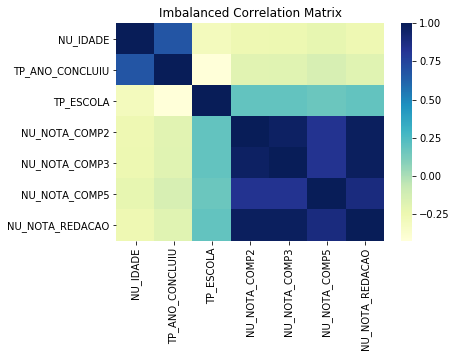

In [159]:
fig, ax = plt.subplots()  

# Imbalanced DataFrame Correlation
corr = X_new.corr()
sns.heatmap(corr, cmap='YlGnBu', annot_kws={'size':30}, ax=ax)
ax.set_title("Imbalanced Correlation Matrix", fontsize=12)
plt.show()

In [176]:
import imblearn
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
x, y = oversample.fit_resample(X_new, Y)

In [187]:
x.shape

(23894, 7)

# Modelo

In [96]:
# fit model no training data
model = XGBClassifier()

In [180]:
model.fit(x, y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, eta=0.1, gamma=0.3,
              gpu_id=-1, importance_type='gain', interaction_constraints='',
              learning_rate=0.100000001, max_delta_step=0, max_depth=8,
              min_child_weight=5, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [181]:
model.score(x,y)

0.9951033732317737

In [188]:
# make predictions for test data
y_pred = model.predict(X_new)
predictions = [round(value) for value in y_pred]

In [189]:
# score
accuracy = accuracy_score(Y, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 99.22%


In [190]:
from sklearn.metrics import precision_score, recall_score, accuracy_score

y_pred = model.predict(X_new)

print("Precision = {}".format(precision_score(Y, y_pred, average='macro'))) # 
print("Recall = {}".format(recall_score(Y, y_pred, average='macro'))) # true positives identicados
print("Accuracy = {}".format(accuracy_score(Y, y_pred))) # previsões corretas

Precision = 0.9764607198857815
Recall = 0.9897960946507949
Accuracy = 0.9922068463219228


# Randon Search

In [151]:
# Random Search
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import f1_score

clf = xgb.XGBClassifier()
parameters = {
     "eta"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30],
     "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
     "min_child_weight" : [ 1, 3, 5, 7, 9],
     "gamma"            : [ 0.0, 0.1, 0.2, 0.3, 0.4, 0.5],
     "colsample_bytree" : [ 0.3, 0.4, 0.5, 0.7, 1]
     }

rand = RandomizedSearchCV(clf,
                          parameters, 
                          n_jobs=4,
                          cv=5)
rand.fit(X_new, Y)

rand.best_params_

{'min_child_weight': 5,
 'max_depth': 8,
 'gamma': 0.3,
 'eta': 0.1,
 'colsample_bytree': 0.4}

In [152]:
param = rand.best_params_

In [153]:
# fit model no training data
model = XGBClassifier(booster='gbtree', 
                      min_child_weight= 5,
                      max_depth= 8,
                      gamma= 0.3,
                      eta= 0.1,
                      colsample_bytree= 0.4)
model.fit(X_new, Y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, eta=0.1, gamma=0.3,
              gpu_id=-1, importance_type='gain', interaction_constraints='',
              learning_rate=0.100000001, max_delta_step=0, max_depth=8,
              min_child_weight=5, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [154]:
accuracy = accuracy_score(Y, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 99.60%


In [174]:
y_pred = model.predict(X_new)

print("Precision = {}".format(precision_score(Y, y_pred, average='macro'))) # 
print("Recall = {}".format(recall_score(Y, y_pred, average='macro'))) # true positives identicados
print("Accuracy = {}".format(accuracy_score(Y, y_pred))) # previsões corretas

Precision = 0.9928925799181484
Recall = 0.9877073451302798
Accuracy = 0.9956300072833212


In [156]:
y_pred[y_pred==1].shape

(1761,)

# Exportação

In [77]:
y_pred = model.predict(X_test)

In [80]:
df_result = pd.DataFrame() 
df_result['NU_INSCRICAO'] = df_test['NU_INSCRICAO']
df_result['IN_TREINEIRO'] = np.around(y_pred, 1)
df_result.head()

,NU_INSCRICAO,IN_TREINEIRO
0,ba0cc30ba34e7a46764c09dfc38ed83d15828897,0
1,177f281c68fa032aedbd842a745da68490926cd2,0
2,6cf0d8b97597d7625cdedc7bdb6c0f052286c334,1
3,5c356d810fa57671402502cd0933e5601a2ebf1e,0
4,df47c07bd881c2db3f38c6048bf77c132ad0ceb3,0


In [81]:
df_result.shape

(4570, 2)

In [139]:
df_result[df_result['IN_TREINEIRO']==1].shape

(564, 2)

In [82]:
df_result.to_csv('answer.csv', index=False, header=True)